<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/GGA_131_v5_asnmt_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

+
I'm adding to the assignment that when you have already done what's asked of you there, before you move onto the other stretch goals, that:

5. You also practice some 1-sample t-tests

6. You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.


## Part 1: Load & Clean The Data 

In [0]:
### YOUR CODE STARTS HERE

In [0]:
#importing libraries
import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, t, ttest_1samp
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt


In [4]:
#loading file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-17 14:40:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-09-17 14:40:45 (463 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [5]:
# checking to see what files are in the current main directory  
!ls

house-votes-84.data  sample_data


In [0]:
# Loading data, creating dataframe df with a custom header
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])


In [7]:
#inspecting data
df.shape


(435, 17)

In [8]:
#inspecting data
df.head(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Here, you can see question marks, that is no good. We must a do something about a that. Next we need to replace the question marks with NaN values - AND set those NaN value back into a new recast DataFrame df. Also we will change the string yes, no (yea, nay) votes to binary 1,0 integers.

In [0]:
# cleaning: +NaN, string to int
df = df.replace({'?':np.NaN, 'n':0, 'y':1})



In [10]:
#inspecting
df.shape

(435, 17)

In [11]:
#instecting
df.head(5)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [12]:
# inspecting
# Looking over abstensions...
#
# "How long can the Britsh hang on in Gebralter, 
# where the tapestries of simitared riders hunt tigers... 
# clinging to the rocks like rock apes, 
# clinging always to less and less."
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
#use "filtering" to create two new party based df (so much for nonpartisan dataframes...a sad day)
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [14]:
#inspect
dem.head(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [15]:
#inspect
rep.head(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


##2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01



In [16]:
print(ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit'))
print(rep['handicapped-infants'].mean(), 'Republican mean')
print(dem['handicapped-infants'].mean(), 'Democratic mean')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)
0.18787878787878787 Republican mean
0.6046511627906976 Democratic mean


###Here the small pvalue below .5, indicates a lack of similarity between the two means compared. 

Here the samll p-value indicates a difference beyond chance between the two. The null hypothesis was th 

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)
0.18787878787878787 Republican mean
0.6046511627906976 Democratic mean

In [0]:
handi = ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit')

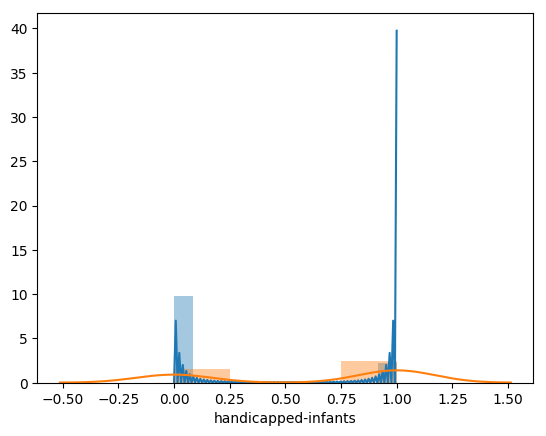

In [18]:
#import matplotlib.pyplot as plt
y1 = rep['handicapped-infants'].dropna()
y2 = dem['handicapped-infants'].dropna()

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

A visual comparison of democratic and republican votes.

##3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01



In [19]:
print(ttest_ind(rep['religious-groups'], dem['religious-groups'], nan_policy='omit'))
print(rep['religious-groups'].mean(), 'Republican mean')
print(dem['religious-groups'].mean(), 'Democratic mean')

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean


Due to our test resulting in a T-Statistic of 9.737575825219457 and a P-value of 2.3936722520597287e-20: we reject the null hypothesis that the two vote means are not different.

Here the small pvalue below .5, indicates a lack of similarity between the two means compared.
I think: The null hypothesis is that they are not different, and the result showing that they are different means strongly rejecting (the null hypothesis) that they are not different (a.k.a. this is evidence that they are are different (in a way beyond mere change result).

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean

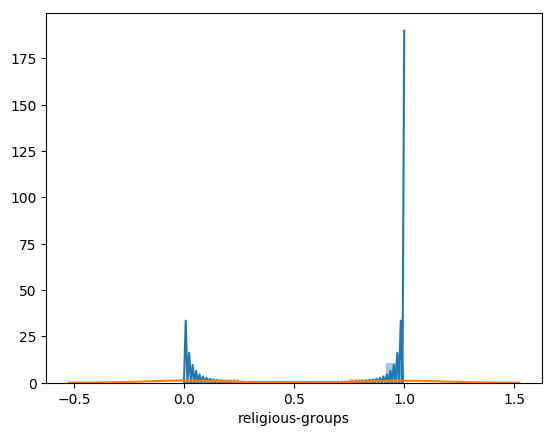

In [20]:
#import matplotlib.pyplot as plt
y1 = rep['religious-groups'].dropna()
y2 = dem['religious-groups'].dropna()

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

A visual comparison of democratic and republican votes.

##4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [21]:
print(ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit'))
print(rep['water-project'].mean(), 'Republican mean')
print(dem['water-project'].mean(), 'Democratic mean')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
0.5067567567567568 Republican mean
0.502092050209205 Democratic mean


Here the pvalue above .5, indicates a similarity between the two means compared.
I think: The null hypothesis is that they are not different, and the result showing that they are very similar falls in the catagory of failing to disprove (the null hypothesis) that they are different (a.k.a. this is evidence that they are similar).

And the T value being near 0 shows they are similar...

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
0.5067567567567568 Republican mean
0.502092050209205 Democratic mean

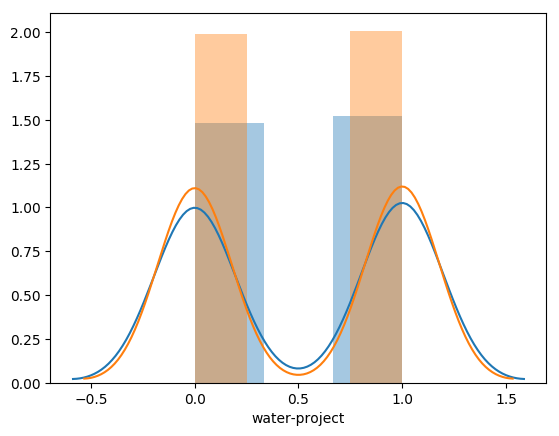

In [22]:
#import matplotlib.pyplot as plt
y1 = rep['water-project'].dropna()
y2 = dem['water-project'].dropna()

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

A visual comparison of democratic and republican votes.


##5. Practice some 1-sample t-tests



In [23]:
#single sample t-tests
# passing nan_policy='omit' 
ttest_1samp(rep['budget'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=5.02528816355446, pvalue=1.3107521045196396e-06)

In [24]:
#single sample t-tests
# passing nan_policy='omit' 
ttest_1samp(rep['budget'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-32.43595087385152, pvalue=5.293293090366981e-73)

In [25]:
ttest_1samp(dem['budget'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=45.42101898369565, pvalue=2.3005685556379574e-125)

In [26]:
ttest_1samp(dem['budget'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-5.702205846437985, pvalue=3.217258173105712e-08)

In [27]:

ttest_1samp(rep['water-project'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=12.28932045559371, pvalue=2.525482675130834e-24)

In [28]:

ttest_1samp(dem['water-project'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=15.49193338482967, pvalue=6.633846650320544e-38)

##6. You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics. 

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean


Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
0.5067567567567568 Republican mean
0.502092050209205 Democratic mean

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean

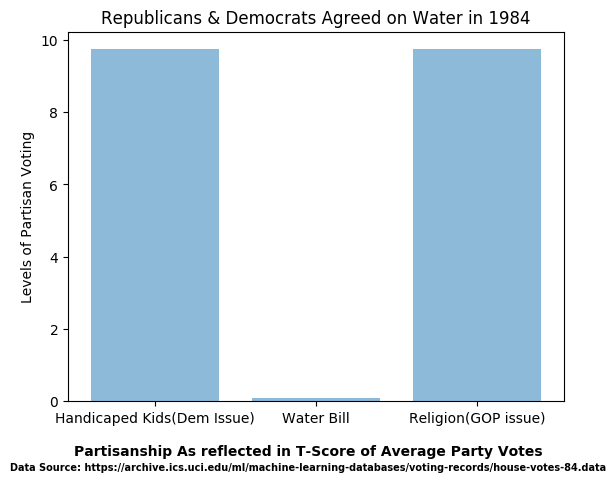

In [63]:
#https://pythonspot.com/matplotlib-bar-chart/

import matplotlib.pyplot as plt; plt.rcdefaults()

fig = plt.figure()

objects = ('Handicaped Kids(Dem Issue)', 'Water Bill', 'Religion(GOP issue)')
y_pos = np.arange(len(objects))
performance = [9.737575825219457,0.08896538137868286,9.737575825219457]


plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Levels of Partisan Voting')
plt.title('Republicans & Democrats Agreed on Water in 1984')


plt.text(x=-.5, y=-1.5, s="Partisanship As reflected in T-Score of Average Party Votes", 
        fontweight='bold', fontsize=10);
plt.text(x=-.9, y=-1.9, s="Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", 
        fontweight='bold', fontsize=7);

plt.show()


Stretch 

ax.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )